In [2]:
# importamos las librería
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

Python: 3.9.5 (default, May 18 2021, 14:42:02) [MSC v.1916 64 bit (AMD64)]
scipy: 1.10.1
numpy: 1.24.3
matplotlib: 3.7.1


In [3]:
#!pip install sqlalchemy

In [4]:
# Leer la documentación de SQLALCHEMY
import sqlalchemy

In [5]:
#!pip install psycopg2

In [6]:
#!pip install seaborn

In [7]:
# Leer la documentación de PSYCOPG2
import psycopg2

In [8]:
## DB
from sqlalchemy import create_engine
import psycopg2

## data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

## visualization
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Cargamos las credenciales de la base de datos

host = "thebridgechallenge.postgres.database.azure.com"
dbname = "postgres"
user = "postgres@thebridgechallenge"
password = "TheBridge2023"


# Connect to the database
conn = psycopg2.connect(host=host, dbname=dbname, user=user, password=password)

### TABLA MERCHANTS

In [10]:
cursor = conn.cursor()
cursor.execute('SELECT * FROM "DATACHALLENGE".merchants')
columns = [desc[0] for desc in cursor.description]
merchants = cursor.fetchall()
merchants_df = pd.DataFrame(merchants, columns=columns)


In [11]:
merchants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   uuid           1956 non-null   object
 1   industry_code  1956 non-null   object
 2   industry_name  1956 non-null   object
dtypes: object(3)
memory usage: 46.0+ KB


In [12]:
merchants_df.describe()

,uuid,industry_code,industry_name
count,1956,1956,1956
unique,1956,23,44
top,d793ed6ad25e4f0a8ef055422f8ad178,9,Informatica y Electrónica
freq,1,256,194


In [13]:
merchants_df.head()

,uuid,industry_code,industry_name
0,d793ed6ad25e4f0a8ef055422f8ad178,22,Servicios Profesionales y Federaciones
1,18f3cbe5537544cd86c2932a9d02905e,6,Electrodomésticos
2,189ed450530643ac85a5e729314ed585,10,Informatica y Electrónica
3,5627eb7fbf5743af9b5d4a82fd11a840,19,Otros
4,03bbe11d14d4445698deb21a1b34f37c,20,Salud y Belleza


* Sobre qué tipo de producto se pide la financiacón

In [14]:
merchants_df["industry_name"].value_counts().sample(10)

industry_name
Viajes y Turismo                          18
Professional Services and Federations      3
Health and Beauty                         41
Alimentación y Bebidas                    16
Musical instruments                       12
Jewelry                                   32
Otros                                    188
Books                                      5
Food and drinks                            2
Bebés                                     25
Name: count, dtype: int64

* 10 productos más solicitados para financiar

<BarContainer object of 10 artists>

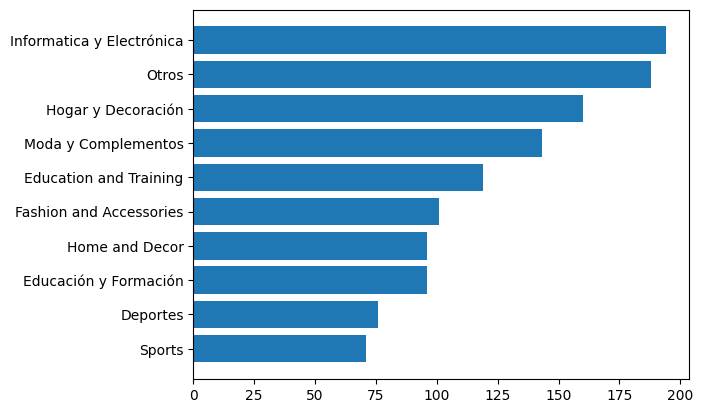

In [15]:
industry_name=merchants_df["industry_name"].value_counts().head(10).sort_values()
plt.barh(industry_name.index, industry_name)

* Codigo del tipo de producto
    > Igual no es necesario, teniendo ya la descripción en industry_name

In [16]:
merchants_df["industry_code"].head()

# para que sirve


0    22
1     6
2    10
3    19
4    20
Name: industry_code, dtype: object

* Identificador del tipo de producto

In [17]:
merchants_df["uuid"].head()

0    d793ed6ad25e4f0a8ef055422f8ad178
1    18f3cbe5537544cd86c2932a9d02905e
2    189ed450530643ac85a5e729314ed585
3    5627eb7fbf5743af9b5d4a82fd11a840
4    03bbe11d14d4445698deb21a1b34f37c
Name: uuid, dtype: object

### TABLA ORDERS

In [18]:

cursor.execute('SELECT * FROM "DATACHALLENGE".orders')
columns = [desc[0] for desc in cursor.description]
orders = cursor.fetchall()
orders_df = pd.DataFrame(orders, columns=columns)

In [19]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30288 entries, 0 to 30287
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uuid                    30288 non-null  object        
 1   merchant_uuid           30288 non-null  object        
 2   created                 30288 non-null  datetime64[ns]
 3   country                 30288 non-null  object        
 4   annual_percentage_rate  30288 non-null  float64       
 5   number_instalments      30288 non-null  int64         
 6   booking                 30288 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.6+ MB


In [20]:
orders_df.describe()

,created,annual_percentage_rate,number_instalments,booking
count,30288,30288.000000,30288.000000,30288.000000
mean,2018-08-09 08:38:59.055397376,18.003554,6.751651,306.476432
min,2018-01-01 01:22:28.959780,-0.000255,0.000000,0.530000
25%,2018-05-17 14:47:47.913558784,20.000000,4.000000,97.215000
50%,2018-09-05 12:30:01.470914816,24.500000,6.000000,185.935000
75%,2018-11-10 21:38:33.092625664,24.500000,12.000000,364.937500
max,2018-12-31 23:53:17.650640,315.949970,24.000000,3000.000000
std,NaN,10.383416,3.927623,368.792923


* identificador del crédito

In [21]:
orders_df["uuid"].head()

0    69104dd917474265a25d2ea0b71a9445
1    84c593405aa145da93de781266103eea
2    44f66d51e46441f6be393caff6e3ba1a
3    d00c1699becc4ac0b2af7741923d33d9
4    7ec194425c6a49919f38b5064183da1f
Name: uuid, dtype: object

* Tipo de producto para unirlo con la tabla merchants

In [22]:
orders_df["merchant_uuid"].head()

0    be7d7febda224ff492b12232cd7ad1f0
1    4350a1412c2e4dd78d36224d9ab78598
2    ad9e0106c88f4fc2b77a54ac3dfac954
3    f43a67a66d6f42779459fff92bc713e9
4    dadfda2ead7448ea83d181f3fd9ffb07
Name: merchant_uuid, dtype: object

* fecha del pedido de credito

In [23]:
orders_df["created"].head()

#formato Timestamp
#pueden sobrar horas, minutos, segundos??

0   2018-01-01 01:22:28.959780
1   2018-01-01 06:38:55.516623
2   2018-01-01 08:21:45.401655
3   2018-01-01 09:40:03.977784
4   2018-01-01 09:50:55.992350
Name: created, dtype: datetime64[ns]

In [24]:
t=orders_df["created"][1]
type(t)

pandas._libs.tslibs.timestamps.Timestamp

* pais del pedido

In [25]:
orders_df["country"].value_counts()

#siempre es España, puede sobrar

country
Spain    30288
Name: count, dtype: int64

* Interes del préstamo

In [26]:
orders_df["annual_percentage_rate"].sample(10)

4534     20.000000
6707     20.000000
26038    24.500000
15113    18.514482
25796    24.500000
14349     0.000000
14009     0.000000
11632    24.500000
28912     0.000000
28419     0.000000
Name: annual_percentage_rate, dtype: float64

* Número de cuotas del pedido

In [27]:
orders_df["number_instalments"].sample(10)

5198      2
21481     4
4563      4
10795     6
18958    12
3809      8
19530    12
19591    12
9837     12
21780    12
Name: number_instalments, dtype: int64

* Total a abonar, incluido el interés

In [28]:
orders_df["booking"].sample(10)

6079      69.42
2604     756.05
13052     98.27
17118    263.33
19317    107.04
10880     76.20
7456     260.50
26245    270.30
25896     31.50
8345     112.88
Name: booking, dtype: float64

In [29]:
merchants_df.head(2)

,uuid,industry_code,industry_name
0,d793ed6ad25e4f0a8ef055422f8ad178,22,Servicios Profesionales y Federaciones
1,18f3cbe5537544cd86c2932a9d02905e,6,Electrodomésticos


In [30]:
orders_df.head(2)

,uuid,merchant_uuid,created,country,annual_percentage_rate,number_instalments,booking
0,69104dd917474265a25d2ea0b71a9445,be7d7febda224ff492b12232cd7ad1f0,2018-01-01 01:22:28.959780,Spain,24.5,1,1000.00
1,84c593405aa145da93de781266103eea,4350a1412c2e4dd78d36224d9ab78598,2018-01-01 06:38:55.516623,Spain,24.5,12,224.03


* calcular total sin interés, y total con interés, para ver las ganancias totales de la financiera

In [31]:
#query

# Interes y Total a pagar

q='''
SELECT annual_percentage_rate as Interes, booking as Total_Con_Interes 
FROM "DATACHALLENGE".orders
'''

cursor.execute(q)
columns = [desc[0] for desc in cursor.description]
orders = cursor.fetchall()

#dataframe cont Interes y Total a pagar
Vista_interes = pd.DataFrame(orders, columns=columns)

In [32]:
# Columna Importe financiado = Total a pagar / (1-(interes/100))

Vista_interes["Importe Financiado"]=Vista_interes["total_con_interes"]/((Vista_interes["interes"]*100)+1)

In [33]:
print(f'Total con Intereses: {Vista_interes["total_con_interes"].sum()}€')
print(f'Total Financiado: {Vista_interes["Importe Financiado"].sum()}€')
g=Vista_interes["total_con_interes"].sum()-Vista_interes["Importe Financiado"].sum()
print(f'Ganancias Financiera:{g}€')

Total con Intereses: 9282558.175099999€
Total Financiado: 3030269.974587879€
Ganancias Financiera:6252288.20051212€


* total ganado por tipo de producto, En que productos tienen más margen de ganancias?

In [34]:
merchants_df.head()

,uuid,industry_code,industry_name
0,d793ed6ad25e4f0a8ef055422f8ad178,22,Servicios Profesionales y Federaciones
1,18f3cbe5537544cd86c2932a9d02905e,6,Electrodomésticos
2,189ed450530643ac85a5e729314ed585,10,Informatica y Electrónica
3,5627eb7fbf5743af9b5d4a82fd11a840,19,Otros
4,03bbe11d14d4445698deb21a1b34f37c,20,Salud y Belleza


In [35]:
#query

# Tipo de producto financiado y Total a pagar

q='''
    SELECT o.uuid as "Codigo Producto", m.industry_name as "Tipo Producto", o.booking as "Total Con Interes" 
    FROM "DATACHALLENGE".merchants as m
    INNER JOIN "DATACHALLENGE".orders as o ON o.uuid=m.uuid
    
 '''

cursor.execute(q)
columns = [desc[0] for desc in cursor.description]
orders = cursor.fetchall()

#dataframe cont Interes y Total a pagar
Tipo_Producto = pd.DataFrame(orders, columns=columns)

In [36]:
Tipo_Producto

,Codigo Producto,Tipo Producto,Total Con Interes


* Ver evolución por años de pedidos, importes

In [37]:
# Cargamos en pandas la query anterior o consulta de una tabla (TABLE) o cargamos unas vistas (VIEW)

# Obtenemos un dataframe

In [38]:
# EDA...lo de siempre

In [39]:
# INSIGHTS

In [40]:
# Conclusiones

In [41]:
# Inferir datos con otras fuentes externas con API's

In [42]:
# Pueden mostrar los datos en Power BI Desktop (free) / Tableau PRO (de pago)

In [43]:
# Seguir las tareas restantes para paquetizar el trabajo anterior.

# En caso de crear funciones utilizamos bien try...except...finally (pass)
# def nombre_funcion():
#   try:
#     (cond)
#     print("Función ejecutada estado 200")
#   except Exception as e:
#     e
#     print("Ha fallado")
#   finally:
#     print("otra condición final---- ejecutar otra tarea/función")

In [44]:
# # en caso de utilizar logging
# import logging

# logger = logging.getLogger()
# logger.info
# logger.warnings
# logger.alerts